# Practical Example 

### Step 1 :   Import all libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set()

### Step 2 :  Loading raw data

In [2]:
raw_data = pd.read_csv('Real-life-example.csv')
raw_data.shape

(4345, 9)

In [3]:
raw_data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [4]:
raw_data.tail(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


### Step 3 :  Exploring Descriptive statistics of the variables

In [5]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
# But the problem with above data is it gives only numerical values

In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Preprocessing

### Step 4 : Determining the varibale interest

In [8]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [9]:
data = raw_data.drop('Model',axis=1)

In [10]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [11]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Step 5 : Dealing with missing values

In [12]:
data.isna()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [13]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013


In [14]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [15]:
data_no_mv = data.dropna(axis=0)

In [16]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

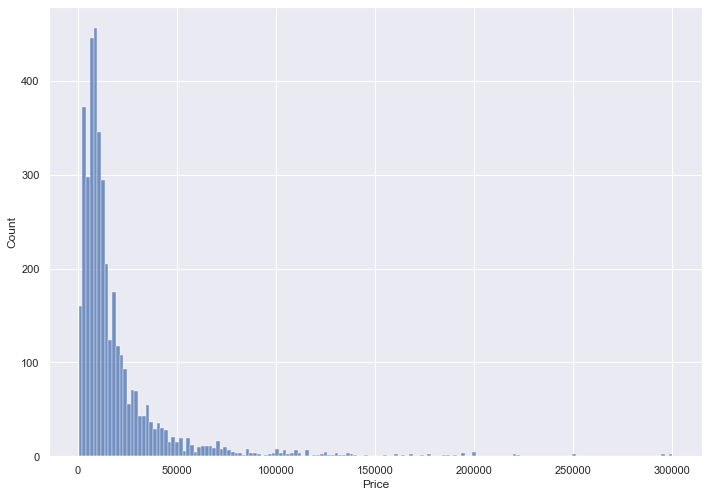

In [17]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers( Remove all outliers using Quantile)

In [18]:
q = data_no_mv['Price'].quantile(0.99)
q

129812.51999999981

In [19]:
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [20]:
data_1 = data_no_mv[ data_no_mv['Price'] < q ]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

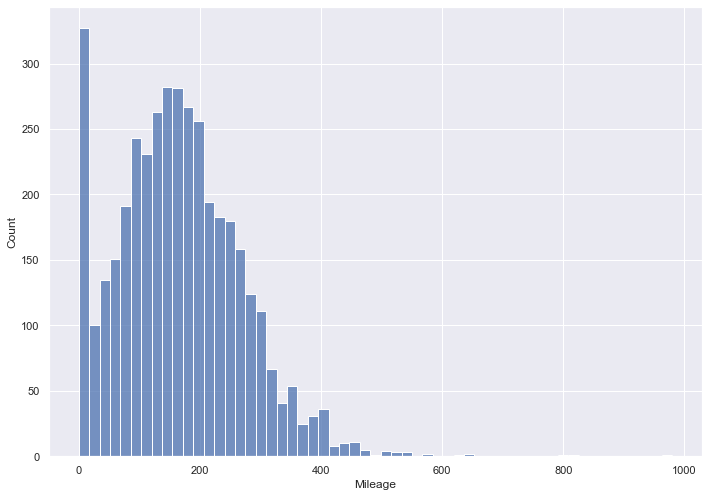

In [21]:
sns.histplot(data_1['Mileage'])

In [22]:
q = data_1['Mileage'].quantile(0.99) #  99 PERCENTILE
q

435.5100000000002

In [23]:
data_2= data_1[data_1['Mileage'] < q ]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

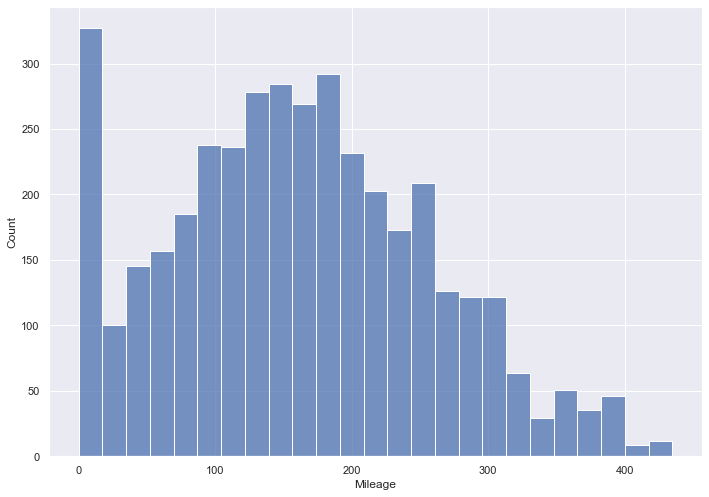

In [24]:
sns.histplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

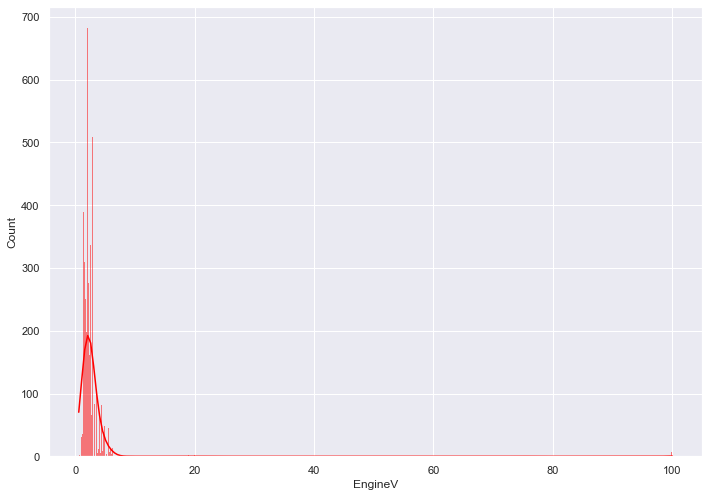

In [25]:
sns.histplot(data_2['EngineV'], color="red", kde=True,  linewidth=0)

In [26]:
data_3 = data_2[data_2['EngineV'] < 6.5 ]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

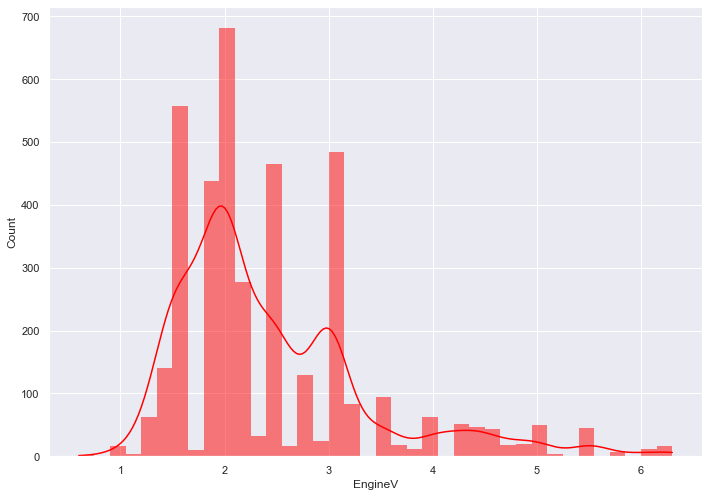

In [27]:
sns.histplot(data_3['EngineV'], color="red", kde=True,  linewidth=0)

<AxesSubplot:xlabel='Year', ylabel='Count'>

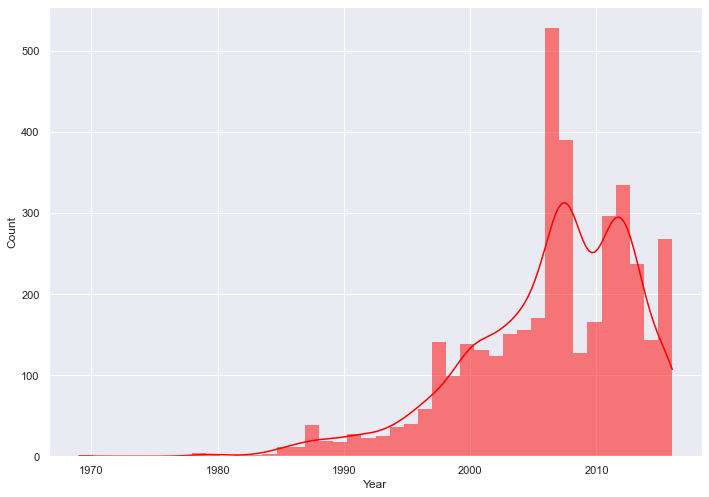

In [28]:
sns.histplot(data_3['Year'], color='red',kde=True, linewidth=0)

In [29]:
q = data_3['Year'].quantile(0.1) # 1 PERCENTILE
q

1998.0

In [30]:
data_4 = data_3[ data_3['Year'] > q ]
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


<AxesSubplot:xlabel='Year', ylabel='Count'>

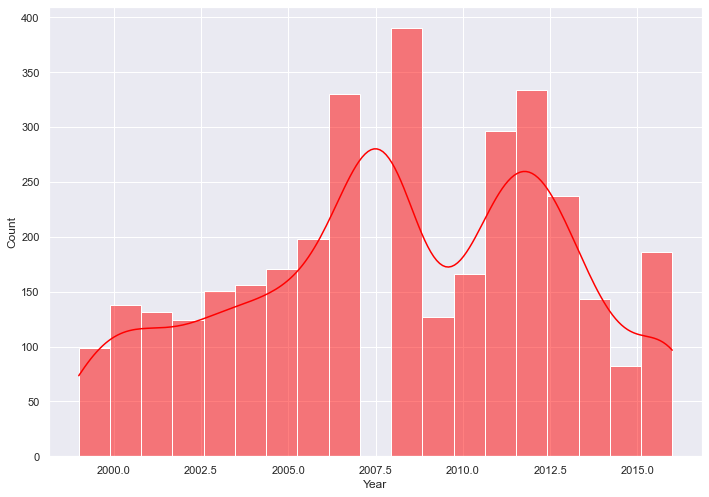

In [31]:
sns.histplot(data_4['Year'], color='red',kde=True, linewidth=1)

In [32]:
# data_4.drop('Registration',axis=1,inplace=True)

In [33]:
data_cleaned = data_4

In [34]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [35]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Text(0.5, 1.0, 'Price vs Mileage')

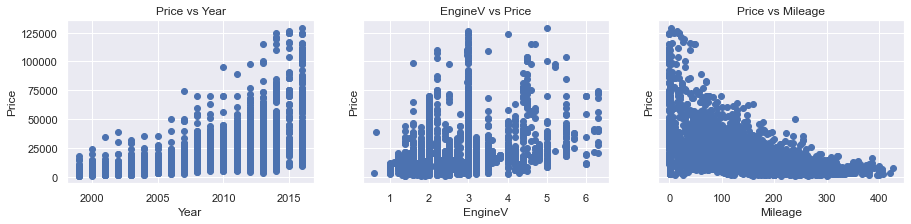

In [36]:
f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

# Price vs Year
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.set_title('Price vs Year')

# EngineV vs Year
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_xlabel('EngineV')
ax2.set_ylabel('Price')
ax2.set_title('EngineV vs Price')


# Mileage Vs Price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Price')
ax3.set_title('Price vs Mileage')

<AxesSubplot:xlabel='Price', ylabel='Count'>

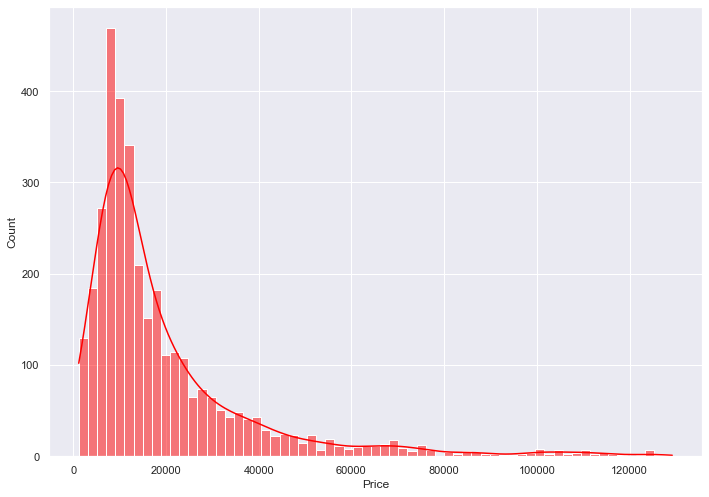

In [37]:
sns.histplot(data_cleaned['Price'], color='red',kde=True, linewidth=1)

In [38]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


<AxesSubplot:xlabel='log_price', ylabel='Count'>

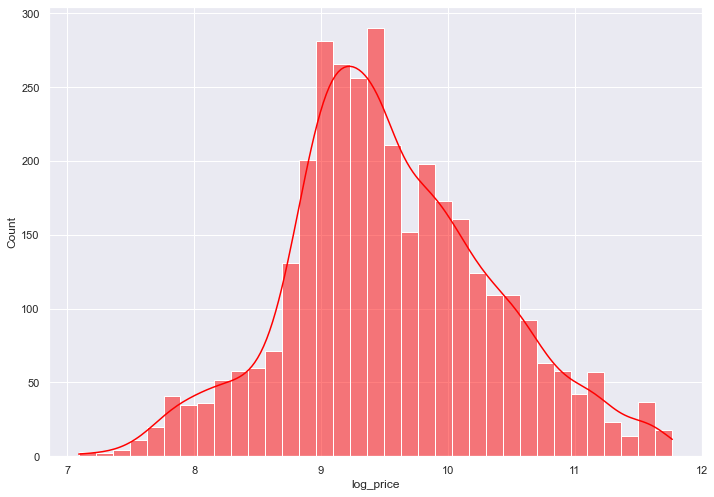

In [39]:
sns.histplot(data_cleaned['log_price'], color='red',kde=True, linewidth=1)

Text(0.5, 1.0, 'Log Price vs Mileage')

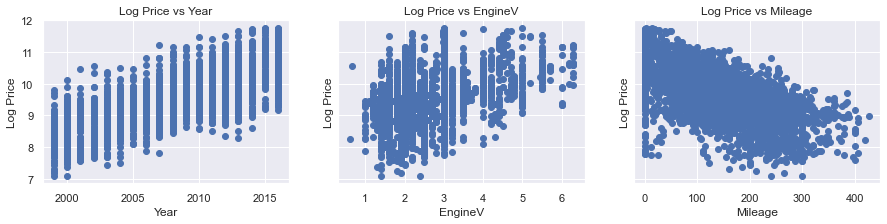

In [40]:
f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))

# Price vs Year
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Log Price')
ax1.set_title('Log Price vs Year')

# EngineV vs Year
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_xlabel('EngineV')
ax2.set_ylabel('Log Price')
ax2.set_title('Log Price vs EngineV')


# Mileage Vs Price
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Log Price')
ax3.set_title('Log Price vs Mileage')

In [41]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


## Linear Regression Assumptions :

### We Need to check if we are not violating these assumptions in order to retain Linear Regression:

- 1.Linearity : Model Must be linear
- 2.Multicolinearity : Model should not be multicolinear we use vif [Varience inflation factor] for that.Multiple regression assumes that the independent variables are not highly correlated with each other.
- 3.Independence [No Endogenity]
- 4.Normality of Residuals : By plotting and by PP or QQ plots. Mean of residuals should be zero
- 5.Homoscedasticity or Constant Variance :  A condition in which the variance of the residual, or error term, in a regression model is constant. 

In [42]:
def plot_correlation(df:pd.DataFrame, numerical_features, target,  k):
    cols = df[numerical_features].corr().nlargest(k,target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm,annot=True,cmap='binary')

In [43]:
def generate_x_y_numeric_targets(df: pd.DataFrame,target):
    numerical_feature_columns = list(df._get_numeric_data().columns)
    X = df.loc[: , df.columns!=target].values
    Y = df.loc[: , df.columns==target].values
    return numerical_feature_columns,X,Y

<AxesSubplot:>

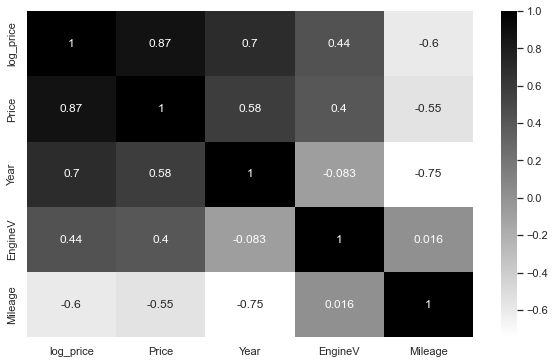

In [44]:
target = 'log_price'

numerical_cols, X, Y = generate_x_y_numeric_targets( data_cleaned, target)
plot_correlation(data_cleaned,numerical_cols,target,5)

In [45]:
check_rank_of_mat_df = data_cleaned[['Mileage','EngineV','Year']]
matrix_check_rank =   check_rank_of_mat_df.to_numpy()

In [46]:
prod = np.dot(matrix_check_rank,matrix_check_rank.T)
prod

array([[4178338.41, 4156877.5 , 4114485.18, ..., 4029837.7 , 3996438.15,
        4076940.8 ],
       [4156877.5 , 4140198.  , 4105962.  , ..., 4037279.  , 4004372.5 ,
        4076441.  ],
       [4114485.18, 4105962.  , 4085666.64, ..., 4044270.6 , 4012247.7 ,
        4069859.4 ],
       ...,
       [4029837.7 , 4037279.  , 4044270.6 , ..., 4056286.  , 4026005.5 ,
        4055304.  ],
       [3996438.15, 4004372.5 , 4012247.7 , ..., 4026005.5 , 3996014.25,
        4024118.  ],
       [4076940.8 , 4076441.  , 4069859.4 , ..., 4055304.  , 4024118.  ,
        4067549.  ]])

In [47]:
np.linalg.matrix_rank(prod)
# So we can say that 3 features are useful. But VIF is the most essestial method amoungst all methods

3

In [48]:
numerical_cols

['Price', 'Mileage', 'EngineV', 'Year', 'log_price']

In [49]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','EngineV','Year']]

vif = pd.DataFrame()
vif['Features'] =  ['Mileage','EngineV','Year']
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

# if vif is greater than 5 then data is little colinear 
# if ---- 5<vif then more colinear
# if ----- 10<vif thant unacceptable


,Features,VIF
0,Mileage,3.891813
1,EngineV,7.424041
2,Year,10.133661


In [51]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [52]:
# Lets Drop the year as its not useful 

In [53]:
data_no_multicolinearity  = data_cleaned.drop('Year',axis=1)

In [54]:
data_no_multicolinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


## Create Dummy Variables :

In [55]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [56]:
data_with_dummies.head(30)

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,7900.0,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,13300.0,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,23000.0,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,18300.0,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,14200.0,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,10799.0,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
6,1400.0,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7,11950.0,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8,9500.0,165,2.70,9.159047,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
9,10500.0,100,1.80,9.259131,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_variable_forvif = data_with_dummies.drop(['Price','log_price'],axis=1)

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(data_variable_forvif.values ,i)  for i in range(data_variable_forvif.shape[1])]
vif['Features'] =  data_variable_forvif.columns.tolist()

vif


,VIF,Features
0,4.682532,Mileage
1,8.268215,EngineV
2,2.235083,Brand_BMW
3,2.953529,Brand_Mercedes-Benz
4,1.723686,Brand_Mitsubishi
5,2.241776,Brand_Renault
6,2.333765,Brand_Toyota
7,2.965009,Brand_Volkswagen
8,1.435331,Body_hatch
9,1.523559,Body_other


In [58]:
data_with_dummies.head(5)

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,14200.0,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [59]:
data_variable_forvif.shape[1]

17

In [60]:
# (data_no_multicolinearity.shape[0] - data_no_multicolinearity.loc[ data_no_multicolinearity['Registration']=='yes' ].shape[0])/data_no_multicolinearity.shape[0] * 100

In [61]:
data_with_dummies.drop(['Price'],axis=1,inplace=True)

In [62]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [63]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol','Registration_yes']

In [64]:
cols

['log_price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [65]:
data_preprocessed = data_with_dummies[cols]

In [66]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3455,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3456,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3457,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### OUR EDA PART HAS FINISHED NOW 🙌✊🥳🎉👏

# Model Training :

# Training Linear Regression Model :

###  Declare inputs and target variables 

In [67]:
targets = data_preprocessed['log_price'] # y
inputs = data_preprocessed.drop(['log_price'],axis=1) # x1 x2 x3....

### Scale the data :

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

# Our scaled inputs
inputs_scaled

array([[ 3.21955251,  0.4485661 , -0.41729416, ..., -0.16344466,
        -0.73442893,  0.30193905],
       [ 2.42351129,  2.60935454, -0.41729416, ..., -0.16344466,
        -0.73442893,  0.30193905],
       [ 1.06216543,  1.78619704, -0.41729416, ..., -0.16344466,
         1.36160214,  0.30193905],
       ...,
       [-1.60284215,  0.55146079, -0.41729416, ..., -0.16344466,
        -0.73442893,  0.30193905],
       [-1.69513679,  1.06593423,  2.39639105, ..., -0.16344466,
         1.36160214,  0.30193905],
       [-0.27610678, -0.47748608, -0.41729416, ..., -0.16344466,
        -0.73442893,  0.30193905]])

- Note : Its not recommeneded to standardize the categorial  variables. In fact many practitioners strongly argue to not to do that

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

x_training, x_testing, y_training, y_testing = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=2)

In [70]:
y_testing

2013     9.928180
3321    10.265131
2977     7.595890
158      9.928180
2374     9.937889
          ...    
1174     8.794825
2622     9.104980
156      9.798127
1828     9.093807
1656     9.998752
Name: log_price, Length: 692, dtype: float64

# Create the Regression

In [71]:
# Our Log linear regression is ready
reg = LinearRegression()
reg.fit(x_training,y_training)

LinearRegression()

In [72]:
y_hat = reg.predict(x_training)

In [73]:
y_hat

array([ 9.82421377,  9.89750951,  9.18061329, ...,  9.41991187,
        9.51148202, 10.73639346])

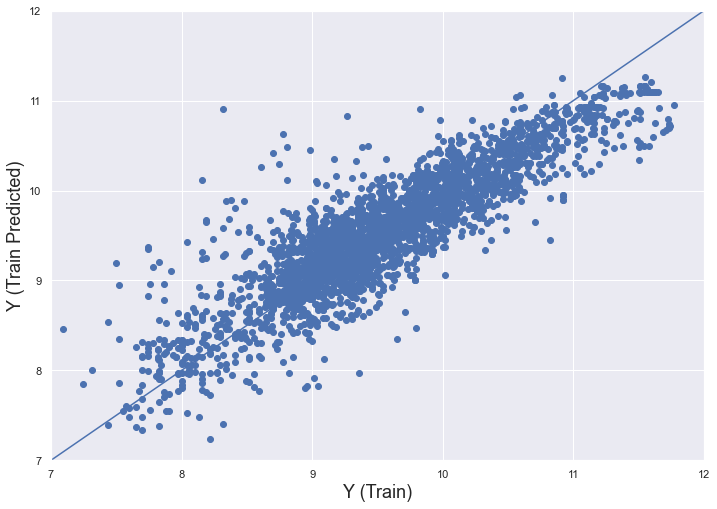

In [74]:
plt.scatter(y_training,y_hat)
plt.axline([0, 0], [1, 1])
plt.xlabel('Y (Train)',size=18)
plt.ylabel('Y (Train Predicted)',size=18)
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

### One of Assumption of Linear Regression : Error should be normally distributed

Text(0.5, 1.0, 'Probability Density Function (PDF) Residual')

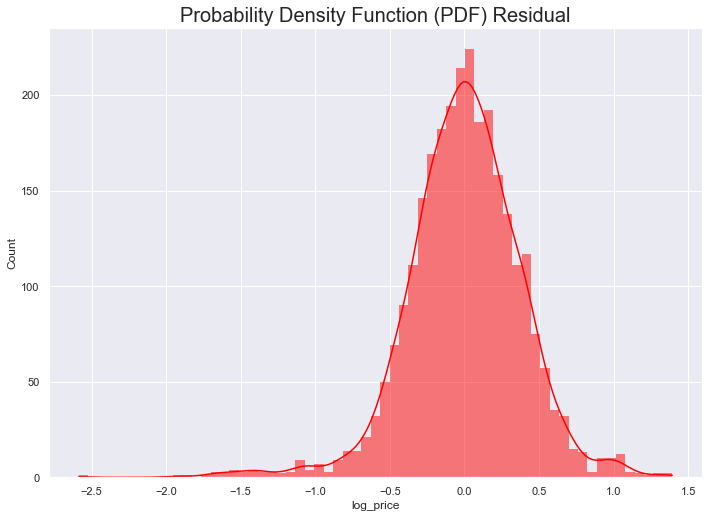

In [75]:
#             ya - yp
sns.histplot(y_training-y_hat, color="red", kde=True,  linewidth=0)
plt.title("Probability Density Function (PDF) Residual",size=20)

In [76]:
np.round( np.mean((y_training-y_hat)),decimals=5) 

-0.0

In [77]:
# Longer tail over-estimate the target
# no tail - rarely underestimate the target

## Calculate R-Squared value :

In [78]:
r2 = reg.score(x_training,y_training)
r2

0.774367889466863

## Calculate R value :

In [79]:
r = r2 ** 0.5
r

0.879981755189767

### Formula for Adjusted R^2



$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [80]:
n = x_training.shape[0]
p = x_training.shape[1]
arsq =  1 - (1-r2) * (n-1)/(n-p-1)
arsq

0.7729725653929949

## Adjusted R Value

In [81]:
adjr =  arsq ** 0.5
adjr

0.8791885835206203

In [82]:
x_training.shape

(2767, 17)

# Lets calculate weights and biases:

### Weights :

In [83]:
reg.intercept_

9.545271142739448

In [84]:
reg.coef_

array([-0.41311233,  0.2101342 ,  0.02087424,  0.00549894, -0.1537491 ,
       -0.20728774, -0.0836478 , -0.10033786, -0.12343794, -0.09245189,
       -0.15009079, -0.10840371, -0.16248421, -0.0989125 , -0.02548343,
       -0.14197593,  0.30959272])

In [85]:
reg_summery = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summery['Weights'] = reg.coef_

In [86]:
reg_summery

,Features,Weights
0,Mileage,-0.413112
1,EngineV,0.210134
2,Brand_BMW,0.020874
3,Brand_Mercedes-Benz,0.005499
4,Brand_Mitsubishi,-0.153749
5,Brand_Renault,-0.207288
6,Brand_Toyota,-0.083648
7,Brand_Volkswagen,-0.100338
8,Body_hatch,-0.123438
9,Body_other,-0.092452


In [87]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

# Testing

In [88]:
y_hat_testing = reg.predict(x_testing)

In [89]:
y_hat_testing

array([10.7892818 , 10.11521383,  7.93129266, 10.2818018 ,  9.90326818,
        9.76522409,  9.44483138,  9.05799612,  9.38187741,  8.27999893,
       10.20713741,  9.51659735, 10.6217052 ,  9.8202223 ,  9.53373319,
        9.16219447,  8.95792662,  8.78984463, 10.62537801, 10.84117119,
        8.74845494,  8.50553873, 10.69076495,  9.55398012,  9.07576115,
        9.44990759, 10.12302115,  9.99693124,  9.50465201,  8.63252254,
        9.22682021,  7.59038236, 11.09871994,  9.27542437,  9.41419148,
       10.08288266,  9.55915729, 10.89394419, 10.79979647, 10.27246419,
        9.78897358,  7.47928912,  9.47914879, 10.86984164,  9.91516127,
       10.10776067,  9.73337174,  8.82425466,  9.76201636,  9.75932956,
        9.54581769,  9.28112967,  9.30138178,  8.38775403, 10.28502633,
        8.18772598, 10.41244337, 11.05732191,  9.57450329, 10.35953963,
        9.24523349,  9.6159382 ,  8.52765392,  9.92750273,  9.11074152,
       10.20246252,  9.37168896,  9.39106152, 10.0812164 ,  9.26

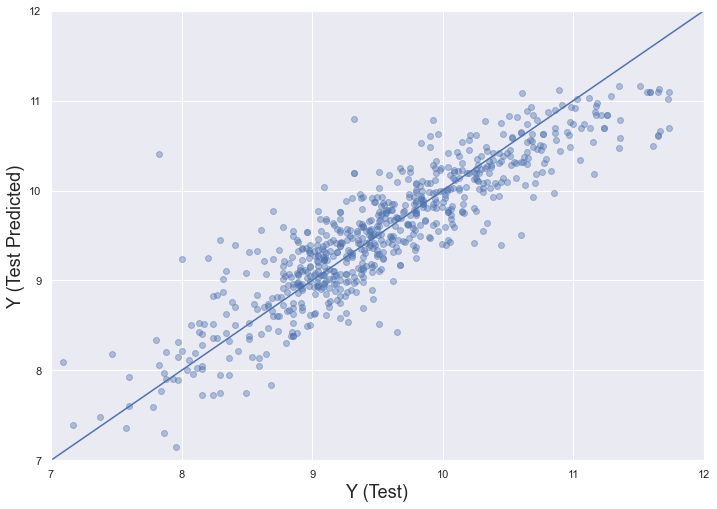

In [90]:
plt.scatter(y_testing,y_hat_testing,alpha=0.4)
plt.axline([0, 0], [1, 1])
plt.xlabel('Y (Test)',size=18)
plt.ylabel('Y (Test Predicted)',size=18)
plt.xlim(7,12)
plt.ylim(7,12)
plt.show()

Text(0.5, 1.0, 'Probability Density Function (PDF) Residual for testing')

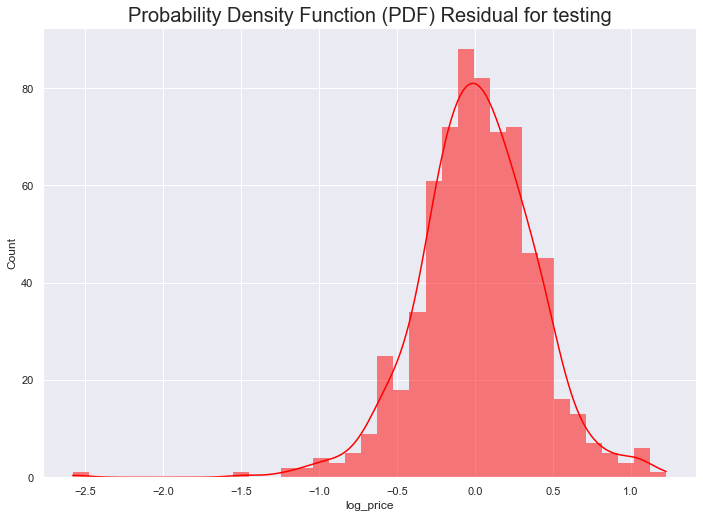

In [91]:
sns.histplot(y_testing-y_hat_testing, color="red", kde=True,  linewidth=0)
plt.title("Probability Density Function (PDF) Residual for testing",size=20)

In [92]:
df_performance = pd.DataFrame(np.exp(y_hat_testing),columns=['Predictions'])

In [93]:
df_performance

,Predictions
0,48498.192198
1,24716.191297
2,2783.021982
3,29196.432241
4,19995.613046
...,...
687,8482.344882
688,16065.612530
689,23948.902446
690,23030.063688


In [94]:
df_performance['Target'] = np.exp(y_testing)

In [95]:
df_performance

,Predictions,Target
0,48498.192198,NaN
1,24716.191297,NaN
2,2783.021982,NaN
3,29196.432241,NaN
4,19995.613046,14200.0
...,...,...
687,8482.344882,NaN
688,16065.612530,NaN
689,23948.902446,NaN
690,23030.063688,NaN


In [96]:
 y_testing

2013     9.928180
3321    10.265131
2977     7.595890
158      9.928180
2374     9.937889
          ...    
1174     8.794825
2622     9.104980
156      9.798127
1828     9.093807
1656     9.998752
Name: log_price, Length: 692, dtype: float64

In [97]:
y_test = y_testing.reset_index(drop=True)

In [98]:
y_test

0       9.928180
1      10.265131
2       7.595890
3       9.928180
4       9.937889
         ...    
687     8.794825
688     9.104980
689     9.798127
690     9.093807
691     9.998752
Name: log_price, Length: 692, dtype: float64

In [99]:
df_performance['Target'] = np.exp(y_test)

In [100]:
df_performance

,Predictions,Target
0,48498.192198,20500.00
1,24716.191297,28713.75
2,2783.021982,1990.00
3,29196.432241,20500.00
4,19995.613046,20700.00
...,...,...
687,8482.344882,6600.00
688,16065.612530,9000.00
689,23948.902446,18000.00
690,23030.063688,8900.00


In [101]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Predictions']

In [102]:
df_performance

,Predictions,Target,Residual
0,48498.192198,20500.00,-27998.192198
1,24716.191297,28713.75,3997.558703
2,2783.021982,1990.00,-793.021982
3,29196.432241,20500.00,-8696.432241
4,19995.613046,20700.00,704.386954
...,...,...,...
687,8482.344882,6600.00,-1882.344882
688,16065.612530,9000.00,-7065.612530
689,23948.902446,18000.00,-5948.902446
690,23030.063688,8900.00,-14130.063688


In [103]:
df_performance['Difference%'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)

In [104]:
df_performance

,Predictions,Target,Residual,Difference%
0,48498.192198,20500.00,-27998.192198,136.576547
1,24716.191297,28713.75,3997.558703,13.922106
2,2783.021982,1990.00,-793.021982,39.850351
3,29196.432241,20500.00,-8696.432241,42.421621
4,19995.613046,20700.00,704.386954,3.402836
...,...,...,...,...
687,8482.344882,6600.00,-1882.344882,28.520377
688,16065.612530,9000.00,-7065.612530,78.506806
689,23948.902446,18000.00,-5948.902446,33.049458
690,23030.063688,8900.00,-14130.063688,158.764761


In [105]:
df_performance.describe()

,Predictions,Target,Residual,Difference%
count,692.000000,692.000000,692.000000,692.000000
mean,18089.593398,20090.606965,2001.013567,31.157694
std,13745.901221,20321.951201,11287.124976,54.763767
min,942.204065,1200.000000,-37810.824887,0.023071
25%,8607.014751,8290.000000,-2381.730969,10.544878
50%,13622.736714,12999.500000,179.401620,22.620277
75%,23899.987743,23525.000000,3227.155045,36.935434
max,70752.281450,125000.000000,80731.170985,1217.840688


In [106]:
pd.options.display.max_rows = (999)
pd.set_option('display.float_format', lambda x : '%.2f' %x)
df_performance.sort_values(['Difference%'])

,Predictions,Target,Residual,Difference%
100,26906.21,26900.00,-6.21,0.02
488,9189.88,9200.00,10.12,0.11
28,13422.02,13400.00,-22.02,0.16
273,17755.47,17700.00,-55.47,0.31
456,8970.54,8999.00,28.46,0.32
337,18932.12,19000.00,67.88,0.36
136,10953.14,11000.00,46.86,0.43
516,61234.37,61500.00,265.63,0.43
656,12431.69,12499.00,67.31,0.54
76,2010.37,1999.00,-11.37,0.57
